# About the field in the Dataset

Demographic Information


*  CustomerID: Unique identifier for each customer.
*  Age: Age of the customer.
*  Gender: Gender of the customer (Male/Female).
*  Income: Annual income of the customer in USD.

Marketing-specific Variables
* CampaignChannel: The channel through which the marketing campaign is delivered (Email, Social Media, SEO, PPC, Referral).
* CampaignType: Type of the marketing campaign (Awareness, Consideration, Conversion, Retention).
* AdSpend: Amount spent on the marketing campaign in USD.
* ClickThroughRate: Rate at which customers click on the marketing content.
* ConversionRate: Rate at which clicks convert to desired actions (e.g., purchases).
* AdvertisingPlatform: Confidential.
* AdvertisingTool: Confidential.


Customer Engagement Variables
* WebsiteVisits: Number of visits to the website.
* PagesPerVisit: Average number of pages visited per session.
* TimeOnSite: Average time spent on the website per visit (in minutes).
* SocialShares: Number of times the marketing content was shared on social media.
* EmailOpens: Number of times marketing emails were opened.
* EmailClicks: Number of times links in marketing emails were clicked.

Historical Data
* PreviousPurchases: Number of previous purchases made by the customer.
* LoyaltyPoints: Number of loyalty points accumulated by the customer.

Target Variable
* Conversion: Binary variable indicating whether the customer converted (1) or not (0).

# 1 - Import Packages

In [ ]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
from statsmodels.formula.api import ols

# For saving models
import pickle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/predict-conversion-in-digital-marketing-dataset")

print("Path to dataset files:", path)

100%|██████████| 529k/529k [00:00<00:00, 19.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset/versions/1


In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset/versions/1/digital_marketing_campaign_dataset.csv')

# 2 - EDA

In [ ]:
df.head()

CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

  AdvertisingPlatform AdvertisingTool  Conversion  
0            IsConfid      ToolConfid           1  
1            IsConfid      ToolConfid           1  
2            IsConfid      ToolConfid           1  
3            IsConfid      ToolConfid           1  
4            IsConfid      ToolConfid           1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

CustomerID          Age         Income      AdSpend  ClickThroughRate  \
count   8000.00000  8000.000000    8000.000000  8000.000000       8000.000000   
mean   11999.50000    43.625500   84664.196750  5000.944830          0.154829   
std     2309.54541    14.902785   37580.387945  2838.038153          0.084007   
min     8000.00000    18.000000   20014.000000   100.054813          0.010005   
25%     9999.75000    31.000000   51744.500000  2523.221165          0.082635   
50%    11999.50000    43.000000   84926.500000  5013.440044          0.154505   
75%    13999.25000    56.000000  116815.750000  7407.989369          0.228207   
max    15999.00000    69.000000  149986.000000  9997.914781          0.299968   

       ConversionRate  WebsiteVisits  PagesPerVisit   TimeOnSite  \
count     8000.000000    8000.000000    8000.000000  8000.000000   
mean         0.104389      24.751625       5.549299     7.727718   
std          0.054878      14.312269       2.607358     4.228218   
min          0.010018       0.000000       1.000428     0.501669   
25%          0.056410      13.000000       3.302479     4.068340   
50%          0.104046      25.000000       5.534257     7.682956   
75%          0.152077      37.000000       7.835756    11.481468   
max          0.199995      49.000000       9.999055    14.995311   

       SocialShares   EmailOpens  EmailClicks  PreviousPurchases  \
count   8000.000000  8000.000000  8000.000000        8000.000000   
mean      49.799750     9.476875     4.467375           4.485500   
std       28.901165     5.711111     2.856564           2.888093   
min        0.000000     0.000000     0.000000           0.000000   
25%       25.000000     5.000000     2.000000           2.000000   
50%       50.000000     9.000000     4.000000           4.000000   
75%       75.000000    14.000000     7.000000           7.000000   
max       99.000000    19.000000     9.000000           9.000000   

       LoyaltyPoints   Conversion  
count    8000.000000  8000.000000  
mean     2490.268500     0.876500  
std      1429.527162     0.329031  
min         0.000000     0.000000  
25%      1254.750000     1.000000  
50%      2497.000000     1.000000  
75%      3702.250000     1.000000  
max      4999.000000     1.000000

Note:
* Thu nhập trung bình hàng năm của KH trong Dataset là 84K/Year
* Ads Bugdet trung bình là $5K
* CTR trung bình là 15%
* CR trung bình là 10%
* Traffic trung bình trong Dataset này là 24 user
* Trung bình 1 Page có 5.5 User vào
* Thời gian trung bình trên Website của User là 7'
* Số lần share content trung bình của User tử Website ra là 49 lần
* Số Email được mở trung bình bởi User là 9.4 Email
* Số lần click vào link trong Email trung bình bởi User là 4.4 lần
* Tổng số lần đã mua hàng của User trung bình là 4.4 lần
* Điểm tích lũy mua hàng trung bình của User là 2490 Points

## 2.1 - Detailed EDA 1 - Check Outlier

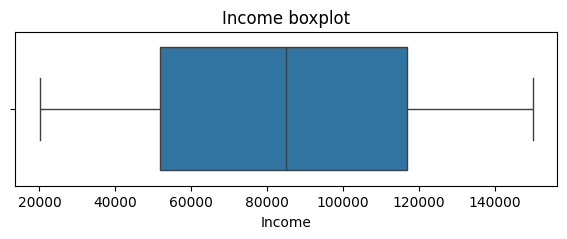

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['Income'])
plt.title('Income boxplot')
plt.show()

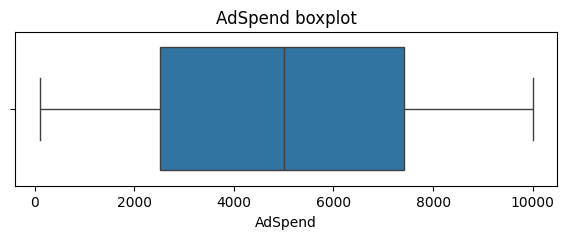

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['AdSpend'])
plt.title('AdSpend boxplot')
plt.show()

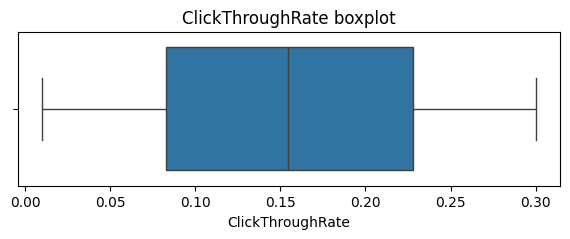

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['ClickThroughRate'])
plt.title('ClickThroughRate boxplot')
plt.show()

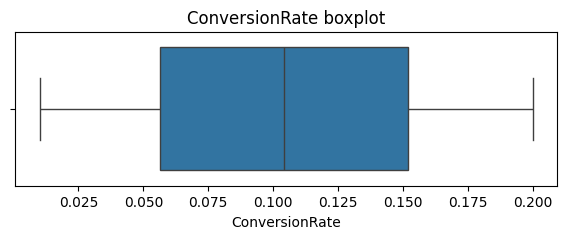

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['ConversionRate'])
plt.title('ConversionRate boxplot')
plt.show()

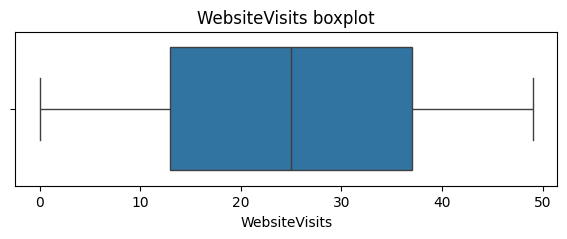

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['WebsiteVisits'])
plt.title('WebsiteVisits boxplot')
plt.show()

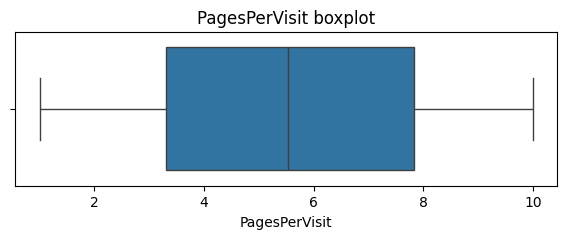

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['PagesPerVisit'])
plt.title('PagesPerVisit boxplot')
plt.show()

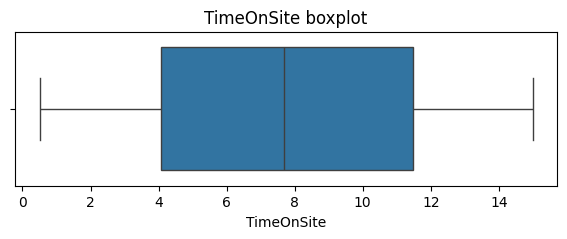

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['TimeOnSite'])
plt.title('TimeOnSite boxplot')
plt.show()

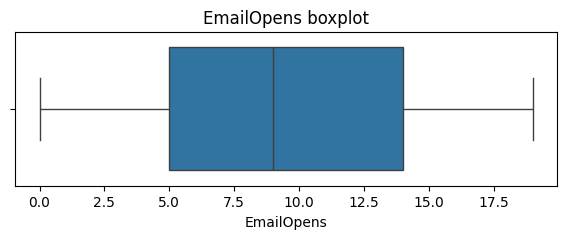

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['EmailOpens'])
plt.title('EmailOpens boxplot')
plt.show()

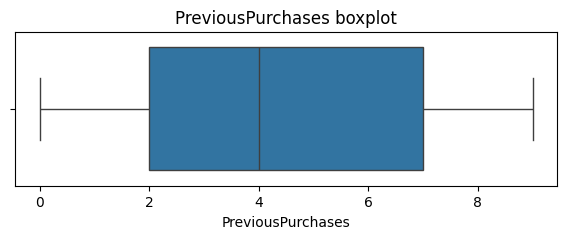

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['PreviousPurchases'])
plt.title('PreviousPurchases boxplot')
plt.show()

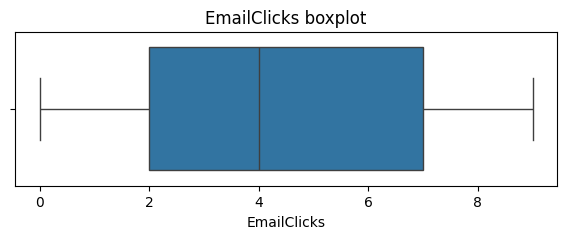

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['EmailClicks'])
plt.title('EmailClicks boxplot')
plt.show()

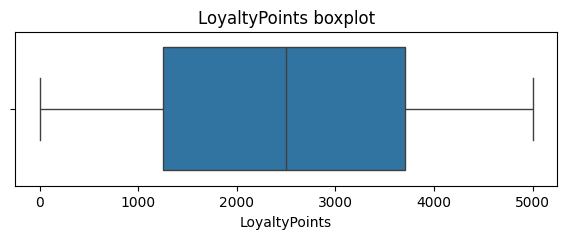

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['LoyaltyPoints'])
plt.title('LoyaltyPoints boxplot')
plt.show()

Không có gì bất thường => Next

## 2.2 - Detailted EDA 2

In [ ]:
import plotly.express as px
# 1 is conversion, 0 is not Conversion
Conversion_counts = df['Conversion'].value_counts().reset_index()
Conversion_counts.columns = ['Conversion', 'Count']

fig = px.pie(Conversion_counts,
             names='Conversion',
             values='Count',
             title='Pie Chart of Conversion Status',
             hover_data={'Count': True})

fig.update_traces(textinfo='percent+label',  # Show percentages and labels
                  hovertemplate='Conversion: %{label}<br>Count: %{value}<br>Percentage: %{percent}')
fig.show()

12.3% User ở trạng thái No Conversion (988 User) và 87.6% User ở trạng thái Is Conversion (7012 User)

In [ ]:
# Bỏ cột ID vì chỉ mang tính chất định danh
df = df.drop(columns=["CustomerID","AdvertisingPlatform","AdvertisingTool"])

In [ ]:
df.head()

Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0   56  Female  136912    Social Media    Awareness  6497.870068   
1   69    Male   41760           Email    Retention  3898.668606   
2   46  Female   88456             PPC    Awareness  1546.429596   
3   32  Female   44085             PPC   Conversion   539.525936   
4   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

   Conversion  
0           1  
1           1  
2           1  
3           1  
4           1

### 2.2.1 - Detailed EDA by Gender

In [ ]:
import plotly.express as px
# 1 is Male, 0 Female
Gender_counts = df['Gender'].value_counts().reset_index()
Gender_counts.columns = ['Gender', 'Count']

fig = px.pie(Gender_counts,
             names='Gender',
             values='Count',
             title='Pie Chart of Gender',
             hover_data={'Count': True})

fig.update_traces(textinfo='percent+label',  # Show percentages and labels
                  hovertemplate='Gender: %{label}<br>Count: %{value}<br>Percentage: %{percent}')
fig.show()

Tỷ trọng User nữ là 60.5% (4839 User) và Tỷ trọng của User nam là 39.5% (3161 User)

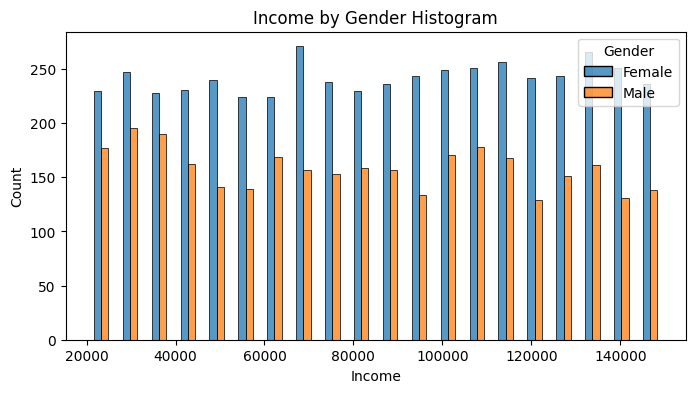

In [ ]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df['Income'], hue=df['Gender'], multiple='dodge', shrink=0.5)
plt.title('Income by Gender Histogram')
plt.show()

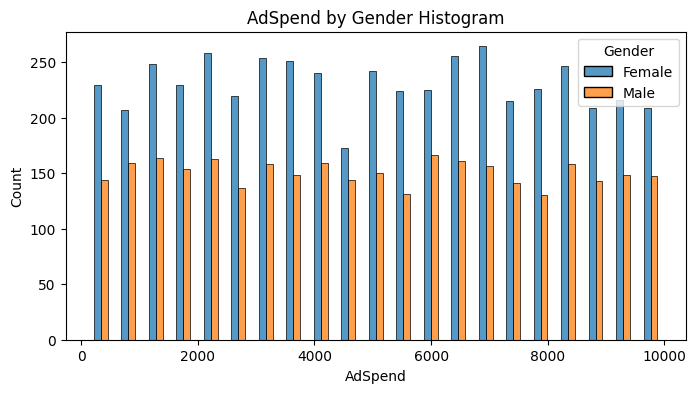

In [ ]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df['AdSpend'], hue=df['Gender'], multiple='dodge', shrink=0.5)
plt.title('AdSpend by Gender Histogram')
plt.show()

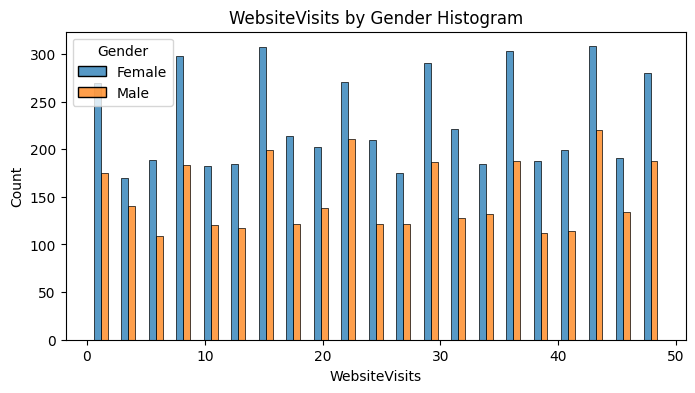

In [ ]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df['WebsiteVisits'], hue=df['Gender'], multiple='dodge', shrink=0.5)
plt.title('WebsiteVisits by Gender Histogram')
plt.show()

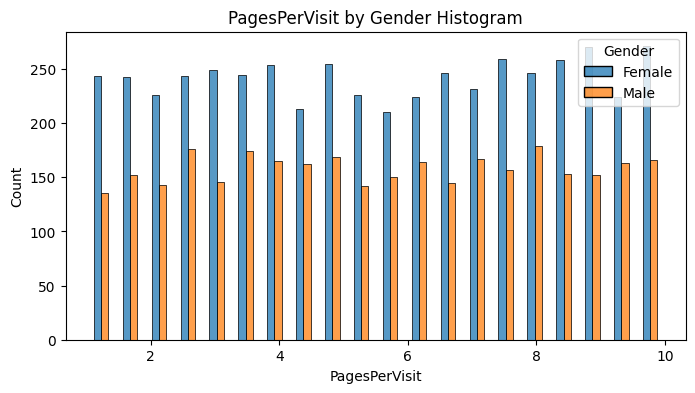

In [ ]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df['PagesPerVisit'], hue=df['Gender'], multiple='dodge', shrink=0.5)
plt.title('PagesPerVisit by Gender Histogram')
plt.show()

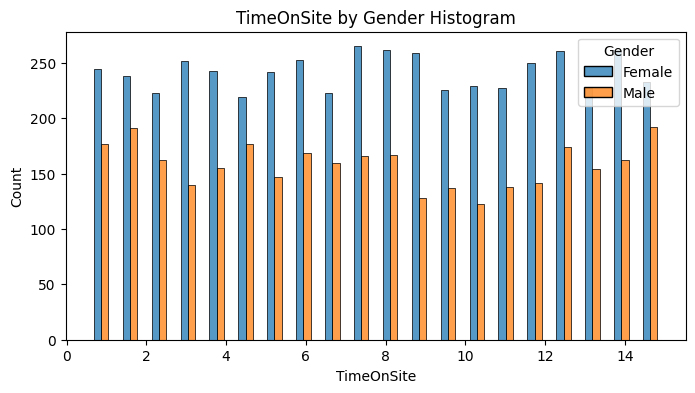

In [ ]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df['TimeOnSite'], hue=df['Gender'], multiple='dodge', shrink=0.5)
plt.title('TimeOnSite by Gender Histogram')
plt.show()

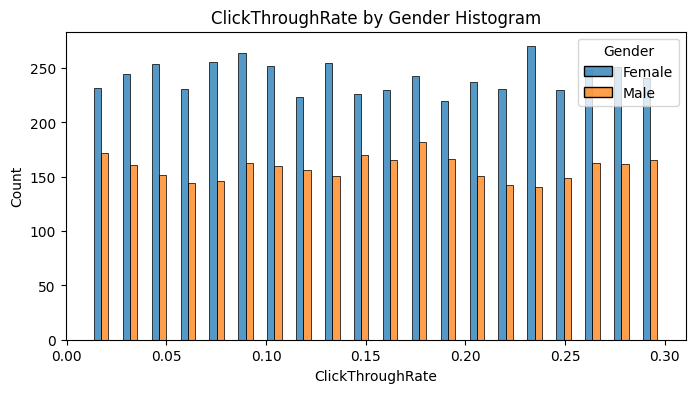

In [ ]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df['ClickThroughRate'], hue=df['Gender'], multiple='dodge', shrink=0.5)
plt.title('ClickThroughRate by Gender Histogram')
plt.show()

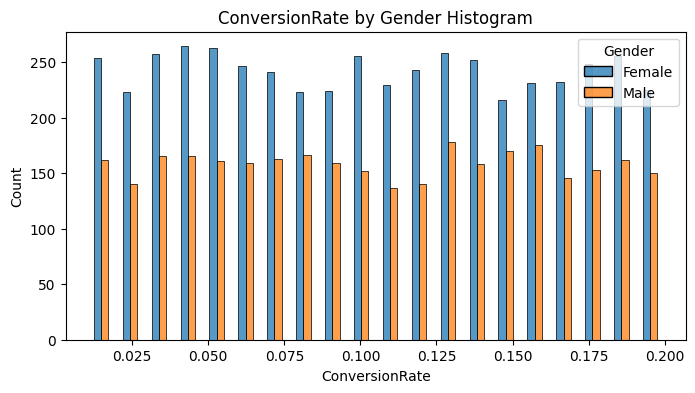

In [ ]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df['ConversionRate'], hue=df['Gender'], multiple='dodge', shrink=0.5)
plt.title('ConversionRate by Gender Histogram')
plt.show()

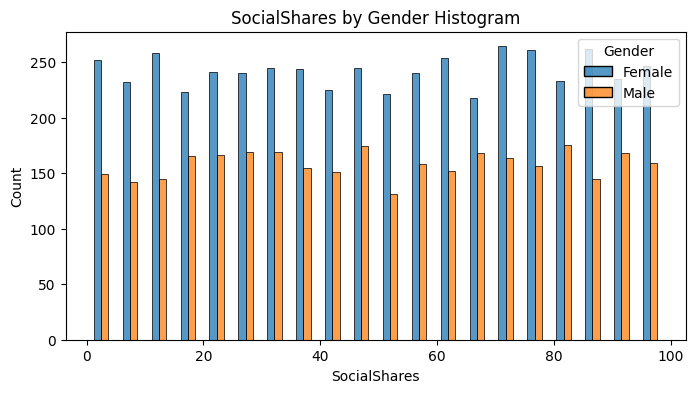

In [ ]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df['SocialShares'], hue=df['Gender'], multiple='dodge', shrink=0.5)
plt.title('SocialShares by Gender Histogram')
plt.show()

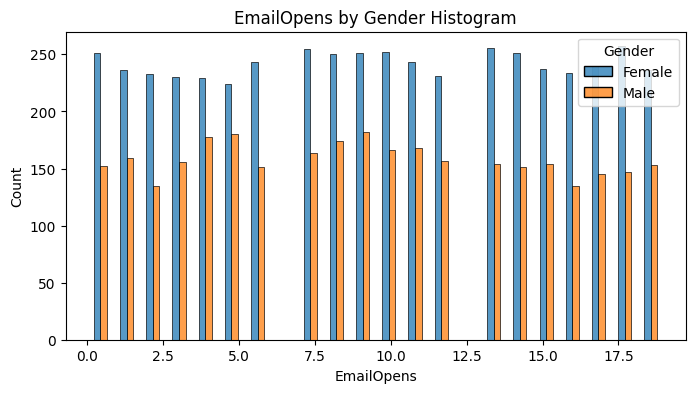

In [ ]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df['EmailOpens'], hue=df['Gender'], multiple='dodge', shrink=0.5)
plt.title('EmailOpens by Gender Histogram')
plt.show()

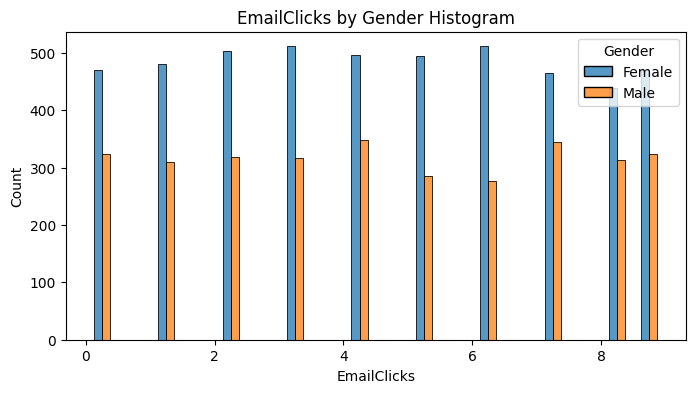

In [ ]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df['EmailClicks'], hue=df['Gender'], multiple='dodge', shrink=0.5)
plt.title('EmailClicks by Gender Histogram')
plt.show()

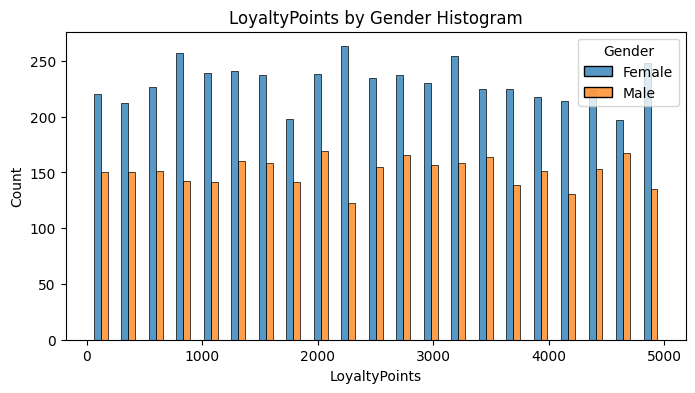

In [ ]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df['LoyaltyPoints'], hue=df['Gender'], multiple='dodge', shrink=0.5)
plt.title('LoyaltyPoints by Gender Histogram')
plt.show()

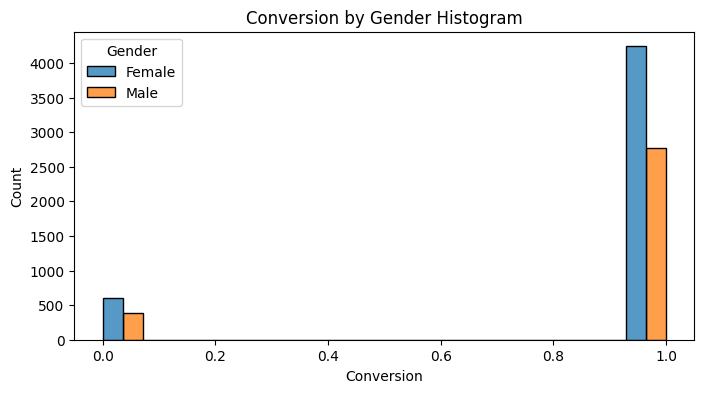

In [ ]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df['Conversion'], hue=df['Gender'], multiple='dodge', shrink=1)
plt.title('Conversion by Gender Histogram')
plt.show()

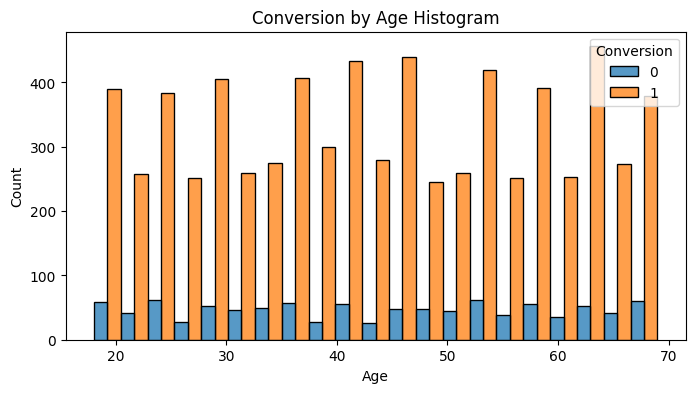

In [ ]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df['Age'], hue=df['Conversion'], multiple='dodge', shrink=1)
plt.title('Conversion by Age Histogram')
plt.show()

In [ ]:
# Top 10 Age have the most Conversion
conversion_counts = df[df['Conversion'] == 1].groupby('Age').size().reset_index(name='conversion_count')
conversion_counts = conversion_counts.sort_values(by='conversion_count', ascending=False).head(10)
print(conversion_counts)

    Age  conversion_count
46   64               174
25   43               163
44   62               162
27   45               160
22   40               155
21   39               152
48   66               152
20   38               148
34   52               148
16   34               148


In [ ]:
# Top 10 Age have the least Conversion
conversion_counts = df[df['Conversion'] == 1].groupby('Age').size().reset_index(name='conversion_count')
conversion_counts = conversion_counts.sort_values(by='conversion_count', ascending=True).head(10)
print(conversion_counts)

    Age  conversion_count
30   48               100
6    24               109
26   44               117
45   63               120
4    22               121
47   65               121
42   60               121
9    27               122
32   50               123
49   67               123


In [ ]:
# Only Male
df1 = df[df['Gender'] == 'Male']

In [ ]:
# Only Female
df2 = df[df['Gender'] == 'Female']

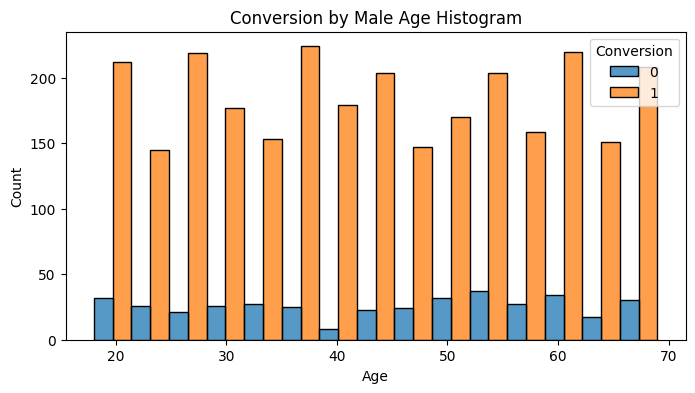

In [ ]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df1['Age'], hue=df['Conversion'], multiple='dodge', shrink=1)
plt.title('Conversion by Male Age Histogram')
plt.show()

In [ ]:
# Top 10 Age have the most Conversion (Male)
conversion_counts = df1[df1['Conversion'] == 1].groupby('Age').size().reset_index(name='conversion_count')
conversion_counts = conversion_counts.sort_values(by='conversion_count', ascending=False).head(10)
print(conversion_counts)

    Age  conversion_count
28   46                70
44   62                68
12   30                68
31   49                67
10   28                66
46   64                65
22   40                65
43   61                60
34   52                60
25   43                60


In [ ]:
# Top 10 Age have the least Conversion (Male)
conversion_counts = df1[df1['Conversion'] == 1].groupby('Age').size().reset_index(name='conversion_count')
conversion_counts = conversion_counts.sort_values(by='conversion_count', ascending=True).head(10)
print(conversion_counts)

    Age  conversion_count
30   48                31
45   63                39
26   44                42
6    24                42
49   67                44
14   32                45
37   55                45
42   60                45
29   47                46
41   59                47


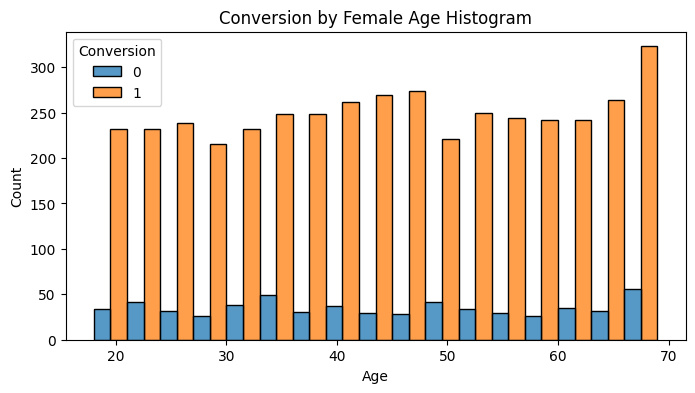

In [ ]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df2['Age'], hue=df['Conversion'], multiple='dodge', shrink=1)
plt.title('Conversion by Female Age Histogram')
plt.show()

In [ ]:
# Top 10 Age have the most Conversion (Female)
conversion_counts = df2[df2['Conversion'] == 1].groupby('Age').size().reset_index(name='conversion_count')
conversion_counts = conversion_counts.sort_values(by='conversion_count', ascending=False).head(10)
print(conversion_counts)

    Age  conversion_count
27   45               110
46   64               109
25   43               103
21   39                98
44   62                94
7    25                94
36   54                93
48   66                93
24   42                92
20   38                91


In [ ]:
# Top 10 Age have the least Conversion (Female)
conversion_counts = df2[df2['Conversion'] == 1].groupby('Age').size().reset_index(name='conversion_count')
conversion_counts = conversion_counts.sort_values(by='conversion_count', ascending=True).head(10)
print(conversion_counts)

    Age  conversion_count
6    24                67
30   48                69
12   30                69
38   56                70
11   29                70
4    22                71
9    27                71
43   61                72
1    19                72
51   69                73


Hành vi mua sắm, thu nhập của User nữ trội User nam và nữ mua sắm đều hơn ở mọi độ tuổi, trong đó Nữ ở tuổi 25 nằm trong Top 10 tuổi có nhiều chuyển đổi nhất, Nam ở tuổi 30 trong Top 10 tuổi có nhiều chuyển đổi nhất. (Theo giới tính)

Ngoài ra, Top 10 độ tuổi mua hàng nhiều nhất (Cả 2 giới tính) đều nằm từ 30 tuổi trở lên

### 2.2.2 - Detailed EDA by Campaign Channel

In [ ]:
CampaignChannel_counts = df['CampaignChannel'].value_counts().reset_index()
CampaignChannel_counts.columns = ['CampaignChannel', 'Count']

fig = px.pie(CampaignChannel_counts,
             names='CampaignChannel',
             values='Count',
             title='Pie Chart of CampaignChannel Type',
             hover_data={'Count': True})

fig.update_traces(textinfo='percent+label',  # Show percentages and labels
                  hovertemplate='CampaignChannel: %{label}<br>Count: %{value}<br>Percentage: %{percent}')
fig.show()

Các loại kênh Campaign có vẻ phân bổ gần như khá đều nhau, check thêm Traffic, Page ver Visit, Time On Site, tổng số lần đã mua, Loyalty Point

In [ ]:
df.head(0)

Empty DataFrame
Columns: [Age, Gender, Income, CampaignChannel, CampaignType, AdSpend, ClickThroughRate, ConversionRate, WebsiteVisits, PagesPerVisit, TimeOnSite, SocialShares, EmailOpens, EmailClicks, PreviousPurchases, LoyaltyPoints, Conversion]
Index: []

<ipython-input-98-706528c5bd65>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




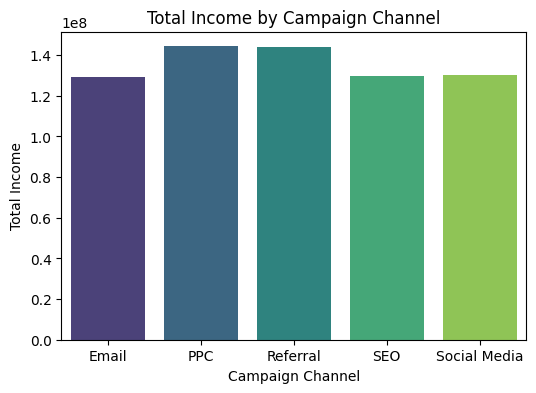

In [ ]:
income_by_channel = df.groupby('CampaignChannel')['Income'].sum().reset_index()

# Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=income_by_channel, x='CampaignChannel', y='Income', palette='viridis')
plt.title('Total Income by Campaign Channel')
plt.xlabel('Campaign Channel')
plt.ylabel('Total Income')
plt.show()

<ipython-input-99-02d5ede990b1>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




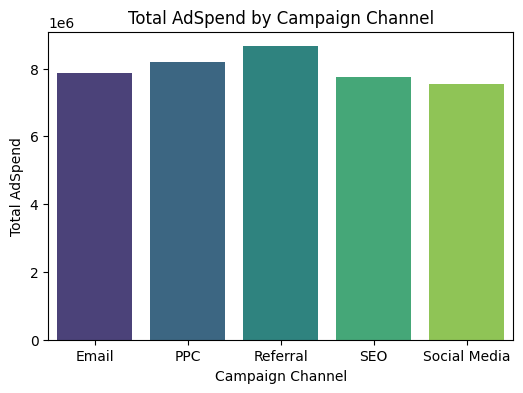

In [ ]:
AdSpend_by_channel = df.groupby('CampaignChannel')['AdSpend'].sum().reset_index()
# Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=AdSpend_by_channel, x='CampaignChannel', y='AdSpend', palette='viridis')
plt.title('Total AdSpend by Campaign Channel')
plt.xlabel('Campaign Channel')
plt.ylabel('Total AdSpend')
plt.show()

<ipython-input-100-bc30403072b6>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




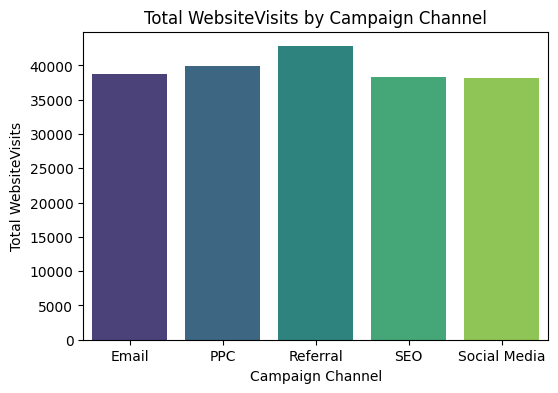

In [ ]:
WebsiteVisits_by_channel = df.groupby('CampaignChannel')['WebsiteVisits'].sum().reset_index()

# Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=WebsiteVisits_by_channel, x='CampaignChannel', y='WebsiteVisits', palette='viridis')
plt.title('Total WebsiteVisits by Campaign Channel')
plt.xlabel('Campaign Channel')
plt.ylabel('Total WebsiteVisits')
plt.show()


<ipython-input-101-8c42cff76922>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




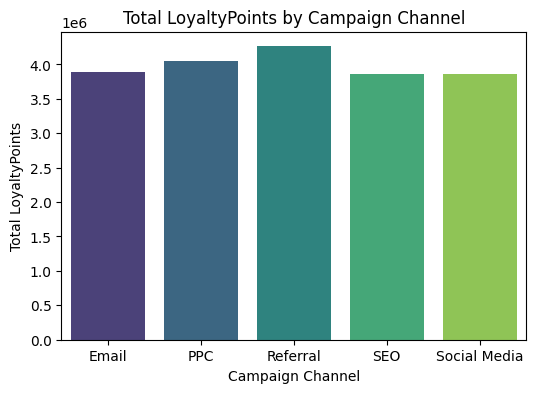

In [ ]:
LoyaltyPoints_by_channel = df.groupby('CampaignChannel')['LoyaltyPoints'].sum().reset_index()

# Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=LoyaltyPoints_by_channel, x='CampaignChannel', y='LoyaltyPoints', palette='viridis')
plt.title('Total LoyaltyPoints by Campaign Channel')
plt.xlabel('Campaign Channel')
plt.ylabel('Total LoyaltyPoints')
plt.show()


<ipython-input-41-4ba914d0fe1a>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




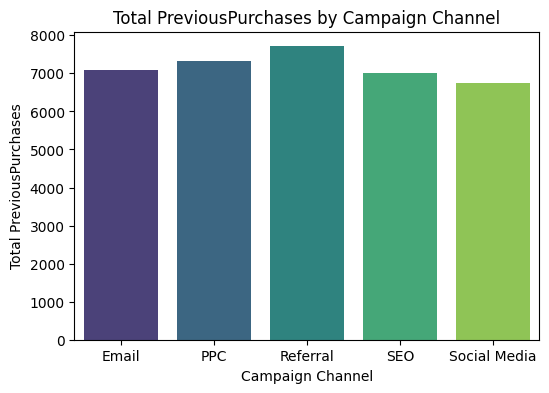

In [ ]:
PreviousPurchases_by_channel = df.groupby('CampaignChannel')['PreviousPurchases'].sum().reset_index()

# Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=PreviousPurchases_by_channel, x='CampaignChannel', y='PreviousPurchases', palette='viridis')
plt.title('Total PreviousPurchases by Campaign Channel')
plt.xlabel('Campaign Channel')
plt.ylabel('Total PreviousPurchases')
plt.show()


Ads Spent và Income, Loyalty, tổng lượt mua hàng từ trước từ nguồn Referal nhỉnh hơn so với các kênh khác

<ipython-input-102-f5607d850d8f>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




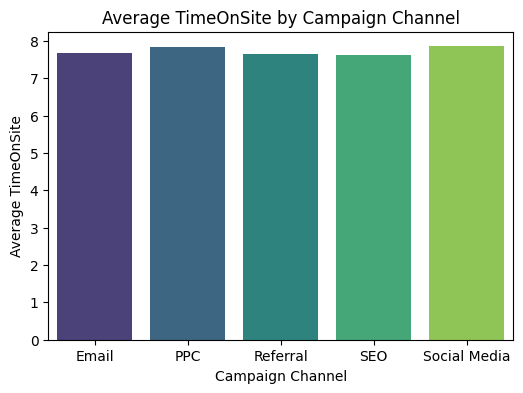

In [ ]:
TimeOnSite_by_channel = df.groupby('CampaignChannel')['TimeOnSite'].mean().reset_index()

# Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=TimeOnSite_by_channel, x='CampaignChannel', y='TimeOnSite', palette='viridis')
plt.title('Average TimeOnSite by Campaign Channel')
plt.xlabel('Campaign Channel')
plt.ylabel('Average TimeOnSite')
plt.show()


<ipython-input-103-697180f9b2c3>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




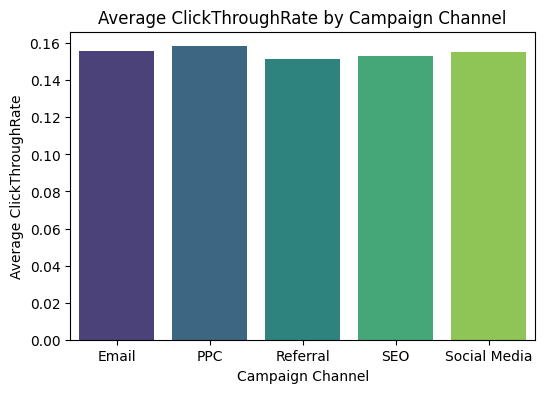

In [ ]:
ClickThroughRate_by_channel = df.groupby('CampaignChannel')['ClickThroughRate'].mean().reset_index()

# Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=ClickThroughRate_by_channel, x='CampaignChannel', y='ClickThroughRate', palette='viridis')
plt.title('Average ClickThroughRate by Campaign Channel')
plt.xlabel('Campaign Channel')
plt.ylabel('Average ClickThroughRate')
plt.show()

CTR, Time on Site của kênh PPC và Email nhỉnh hơn so với các kênh khác

<ipython-input-104-1b6036f2cae7>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




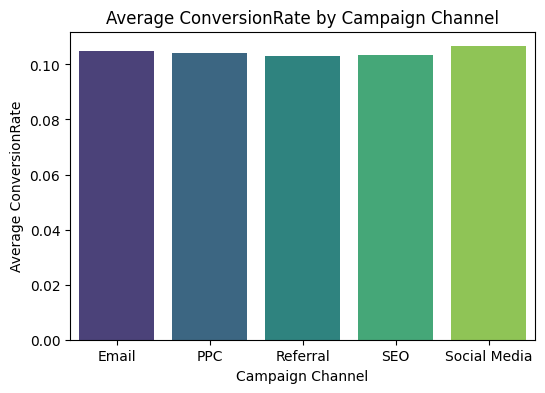

In [ ]:
ConversionRate_by_channel = df.groupby('CampaignChannel')['ConversionRate'].mean().reset_index()

# Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=ConversionRate_by_channel, x='CampaignChannel', y='ConversionRate', palette='viridis')
plt.title('Average ConversionRate by Campaign Channel')
plt.xlabel('Campaign Channel')
plt.ylabel('Average ConversionRate')
plt.show()

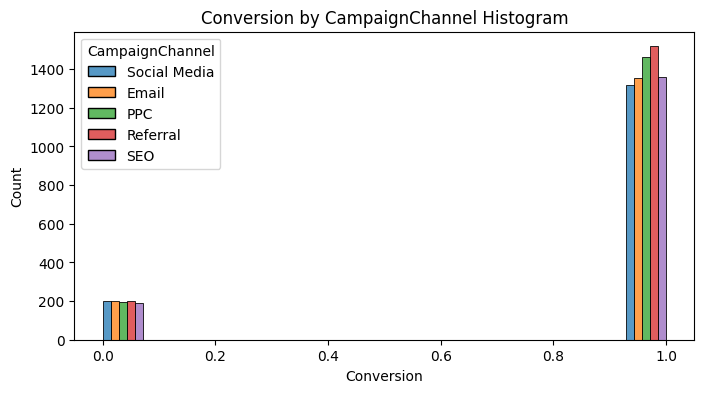

In [ ]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df['Conversion'], hue=df['CampaignChannel'], multiple='dodge', shrink=1)
plt.title('Conversion by CampaignChannel Histogram')
plt.show()

### 2.2.3 - Detailed EDA by Campaign type

In [ ]:
df.head(5)

Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0   56  Female  136912    Social Media    Awareness  6497.870068   
1   69    Male   41760           Email    Retention  3898.668606   
2   46  Female   88456             PPC    Awareness  1546.429596   
3   32  Female   44085             PPC   Conversion   539.525936   
4   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

   Conversion  
0           1  
1           1  
2           1  
3           1  
4           1

In [ ]:
CampaignType_counts = df['CampaignType'].value_counts().reset_index()
CampaignType_counts.columns = ['CampaignType', 'Count']

fig = px.pie(CampaignType_counts,
             names='CampaignType',
             values='Count',
             title='Pie Chart of CampaignType Type',
             hover_data={'Count': True})

fig.update_traces(textinfo='percent+label',  # Show percentages and labels
                  hovertemplate='CampaignType: %{label}<br>Count: %{value}<br>Percentage: %{percent}')
fig.show()

<ipython-input-108-7db02e59e656>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




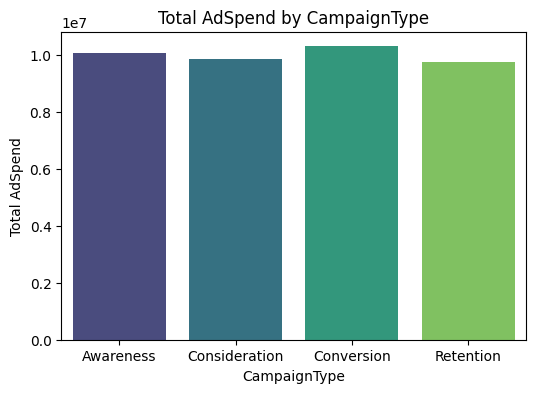

In [ ]:
AdSpend_by_CampaignType = df.groupby('CampaignType')['AdSpend'].sum().reset_index()
# Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=AdSpend_by_CampaignType, x='CampaignType', y='AdSpend', palette='viridis')
plt.title('Total AdSpend by CampaignType')
plt.xlabel('CampaignType')
plt.ylabel('Total AdSpend')
plt.show()

Ngân sách và số lượng cho các mục tiêu được phân bổ gần bằng nhau => Điều tra thêm với đội Marketing xem tại sao lại phân bổ ngân sách như vậy, có yếu tố gì tác động không vì bình thường ngân sách chạy Ads không thể phân bổ sát nhau theo mục tiêu thế này

<ipython-input-109-1267e2060036>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




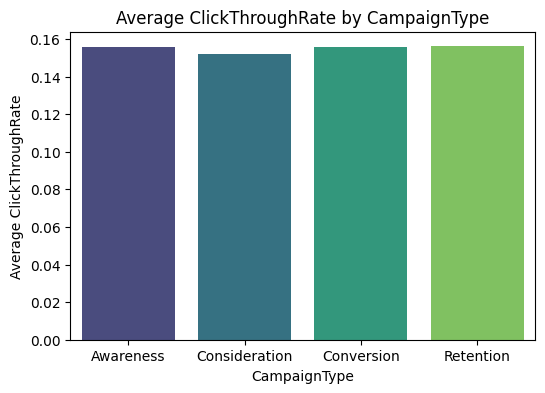

In [ ]:
ClickThroughRate_by_CampaignType = df.groupby('CampaignType')['ClickThroughRate'].mean().reset_index()

# Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=ClickThroughRate_by_CampaignType, x='CampaignType', y='ClickThroughRate', palette='viridis')
plt.title('Average ClickThroughRate by CampaignType')
plt.xlabel('CampaignType')
plt.ylabel('Average ClickThroughRate')
plt.show()

CTR trung bình của các định dạng mục tiêu cũng sát nhau => Có sự bất thường

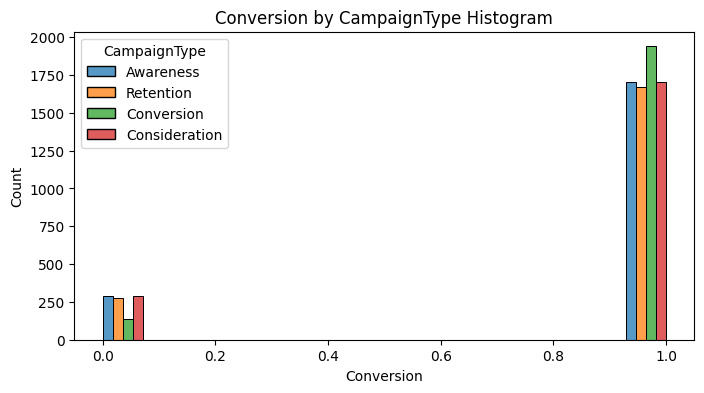

In [ ]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df['Conversion'], hue=df['CampaignType'], multiple='dodge', shrink=1)
plt.title('Conversion by CampaignType Histogram')
plt.show()

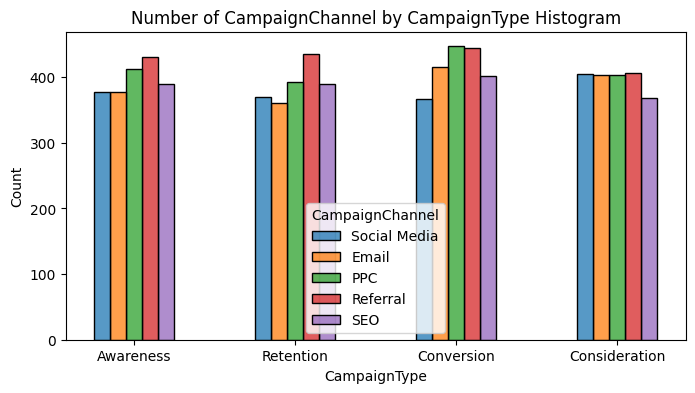

In [ ]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df['CampaignType'], hue=df['CampaignChannel'], multiple='dodge', shrink=0.5)
plt.title('Number of CampaignChannel by CampaignType Histogram')
plt.show()

* Mục tiêu Consideration có số lượng Campaign SEO thấp nhất, các Source Campaign còn lại đang gần như đều với nhau
* Mục tiêu Awareness có Source Refferal và PPC là 2 Source có nhiều Campaign nhất. Ngược lại Social Media với Email đang là thấp nhất

## 2.3 - Correlation Heatmap

In [ ]:
df.head()

Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0   56  Female  136912    Social Media    Awareness  6497.870068   
1   69    Male   41760           Email    Retention  3898.668606   
2   46  Female   88456             PPC    Awareness  1546.429596   
3   32  Female   44085             PPC   Conversion   539.525936   
4   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

   Conversion  
0           1  
1           1  
2           1  
3           1  
4           1

In [ ]:
# Chuyển Categorical thành Numberic Data
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})

<ipython-input-52-c94c312021b3>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
df['CampaignChannel'] = df['CampaignChannel'].replace({'PPC': 1, 'SEO': 2, 'Email':3,'Social Media': 4,'Referral':5})

<ipython-input-53-e2781c1d6532>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
df['CampaignType'] = df['CampaignType'].replace({'Awareness': 1, 'Consideration': 2, 'Conversion':3,'Retention': 4,})

<ipython-input-54-8fd00471f385>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



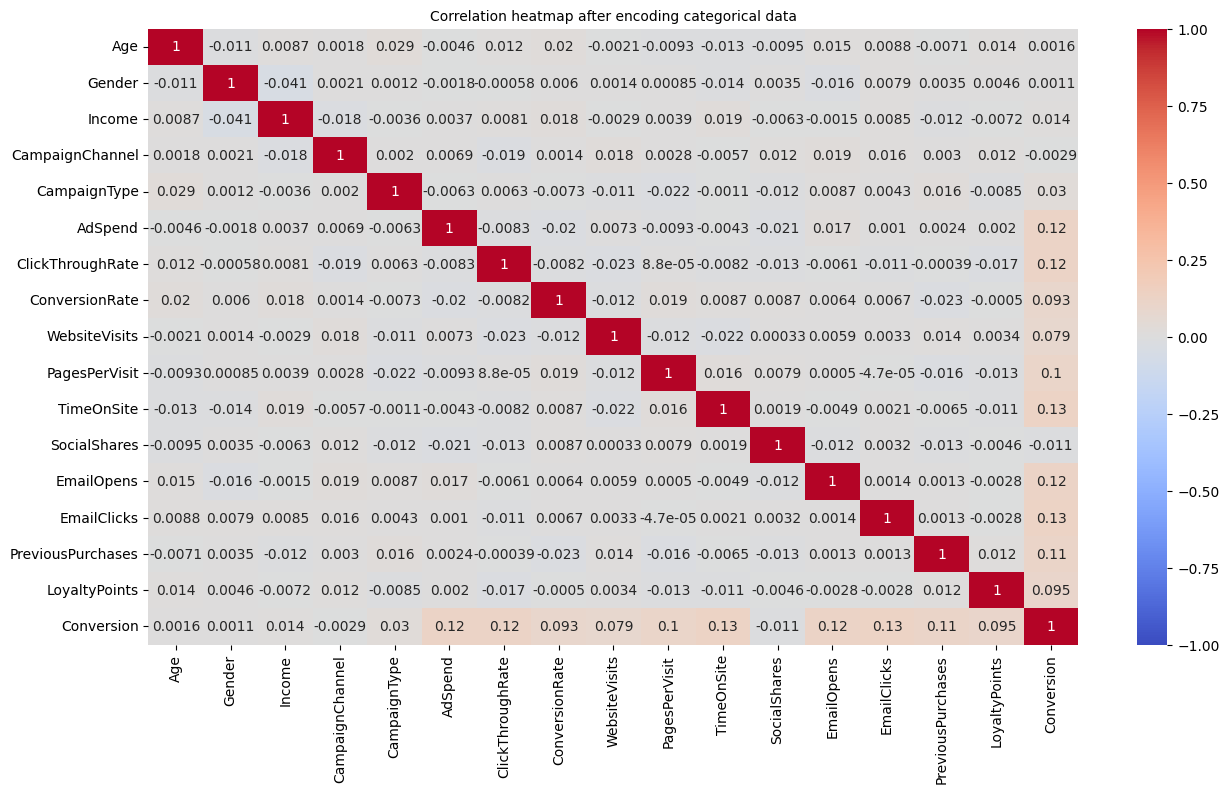

In [ ]:
# Calculate correlation and plot heatmap
plt.figure(figsize=(15,8))
corr_matrix = df.corr(method='pearson')
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap after encoding categorical data', fontsize=10)
plt.show()

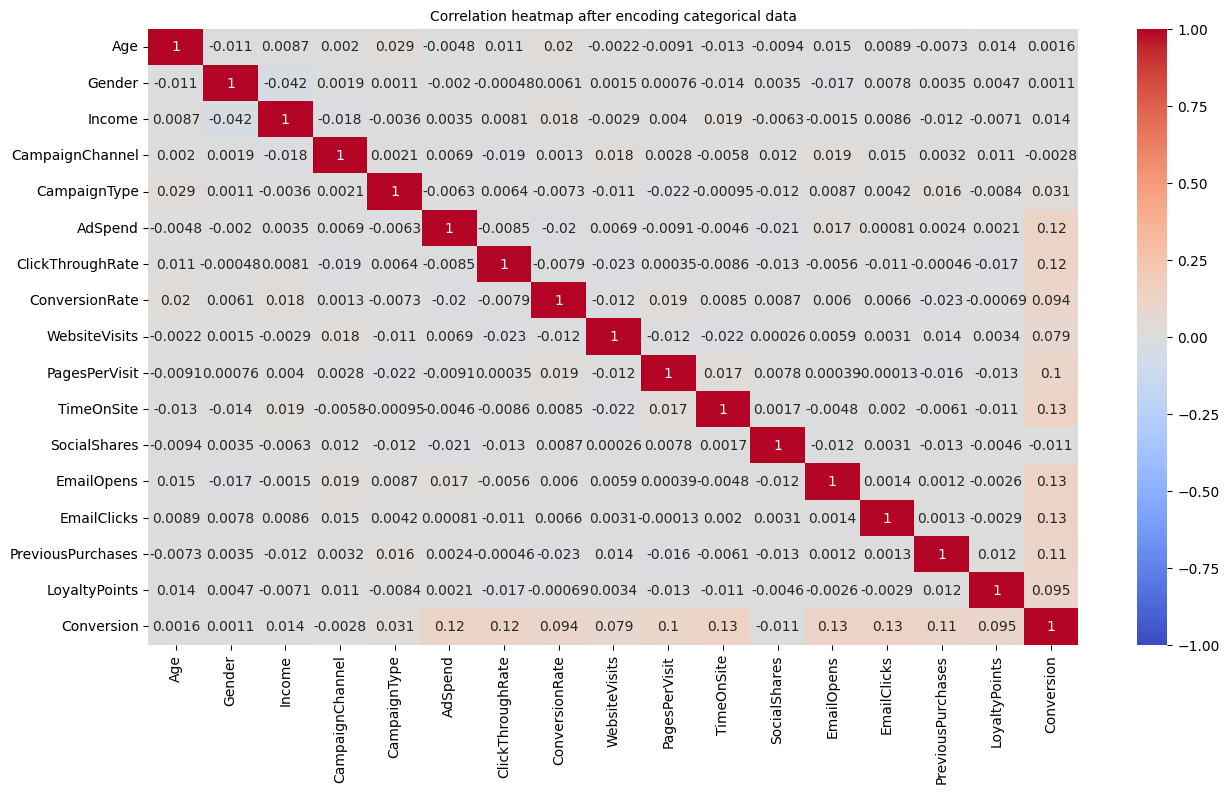

In [ ]:
# Calculate correlation and plot heatmap
plt.figure(figsize=(15,8))
corr_matrix = df.corr(method='spearman')
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap after encoding categorical data', fontsize=10)
plt.show()

# 3 - Conversion Perdiction Model

In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset/versions/1/digital_marketing_campaign_dataset.csv')

In [ ]:
df = df.drop(['CustomerID','AdvertisingTool','AdvertisingPlatform'], axis=1)

In [ ]:
df.head()

Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0   56  Female  136912    Social Media    Awareness  6497.870068   
1   69    Male   41760           Email    Retention  3898.668606   
2   46  Female   88456             PPC    Awareness  1546.429596   
3   32  Female   44085             PPC   Conversion   539.525936   
4   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

   Conversion  
0           1  
1           1  
2           1  
3           1  
4           1

In [ ]:
df['Gender'] = df['Gender'].apply(
    lambda x: 1 if x == 'Female'  else 0
)

In [ ]:
df['CampaignType'] = df['CampaignType'].apply(
    lambda x: 1 if x == 'Awareness' else 2 if x == 'Consideration' else 3 if x == 'Conversion' else 0
)

In [ ]:
df['CampaignChannel'] = df['CampaignChannel'].apply(
    lambda x: 1 if x == 'PPC' else 2 if x == 'Email' else 3 if x == 'SEO' else 4 if x == 'Social Media' else 0
)

In [ ]:
df.head()

Age  Gender  Income  CampaignChannel  CampaignType      AdSpend  \
0   56       1  136912                4             1  6497.870068   
1   69       0   41760                2             0  3898.668606   
2   46       1   88456                1             1  1546.429596   
3   32       1   44085                1             3   539.525936   
4   60       1   83964                1             3  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

   Conversion  
0           1  
1           1  
2           1  
3           1  
4           1

In [ ]:
X = df.drop(['Conversion'], axis=1).reset_index(drop=True)
y = df['Conversion'].reset_index(drop=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
print("Training Data Shape (X_train):", X_train.shape)
print("Training Labels Shape (y_train):", y_train.shape)
print("Testing Data Shape (X_test):", X_test.shape)
print("Testing Labels Shape (y_test):", y_test.shape)

Training Data Shape (X_train): (6400, 16)
Training Labels Shape (y_train): (6400,)
Testing Data Shape (X_test): (1600, 16)
Testing Labels Shape (y_test): (1600,)


### 3.1 - Decision Tree

In [ ]:
clf_DecisionTree = Pipeline([
    ('dt', DecisionTreeClassifier())
])

In [ ]:
clf_DecisionTree.fit(X_train,y_train)

Pipeline(steps=[('dt', DecisionTreeClassifier())])

In [ ]:
y_pred_DT=clf_DecisionTree.predict(X_test)

In [ ]:
# Plot Confusion Matrix
conf_mat_DT=confusion_matrix(y_test, y_pred_DT)

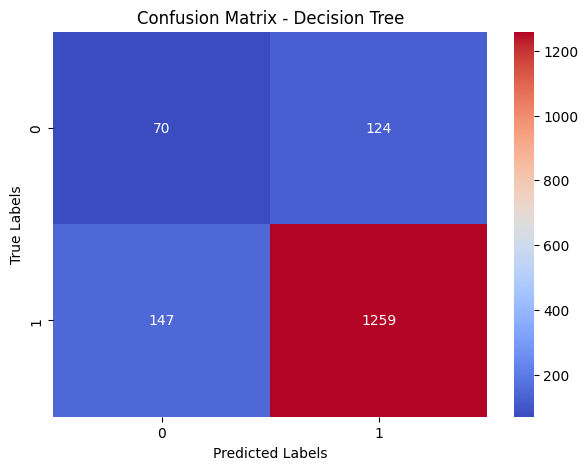

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_mat_DT,annot=True,fmt='d',cmap='coolwarm')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
dt_acc=accuracy_score(y_test,y_pred_DT)
dt_acc

0.830625

In [ ]:
dt_f1=f1_score(y_test,y_pred_DT)
dt_f1

0.9028325564718537

In [ ]:
dt_pe=precision_score(y_test,y_pred_DT)
dt_pe

0.9103398409255242

### 3.2 - Random Forest

In [ ]:
clf_rf= Pipeline([
    ('rf', RandomForestClassifier(n_estimators=100))
])

In [ ]:
clf_rf.fit(X_train,y_train)

Pipeline(steps=[('rf', RandomForestClassifier())])

In [ ]:
y_pred_RF=clf_rf.predict(X_test)

In [ ]:
conf_mat_RF=confusion_matrix(y_test, y_pred_RF)

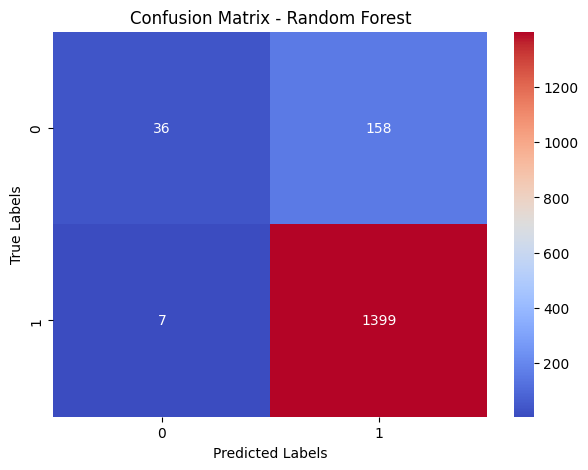

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_mat_RF,annot=True,fmt='d',cmap='coolwarm')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
rf_acc=accuracy_score(y_test,y_pred_RF)
rf_acc

0.896875

In [ ]:
rf_f1=f1_score(y_test,y_pred_RF)
rf_f1

0.9443131960850489

In [ ]:
rf_pe = precision_score(y_test,y_pred_RF)
rf_pe

0.8985228002569043

### 3.3 - Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
clf_NaiveBaised= Pipeline([
    ('nd', MultinomialNB())
])

In [ ]:
clf_NaiveBaised.fit(X_train,y_train)

Pipeline(steps=[('nd', MultinomialNB())])

In [ ]:
y_pred_NB=clf_NaiveBaised.predict(X_test)

In [ ]:
conf_mat_NB=confusion_matrix(y_test, y_pred_NB)

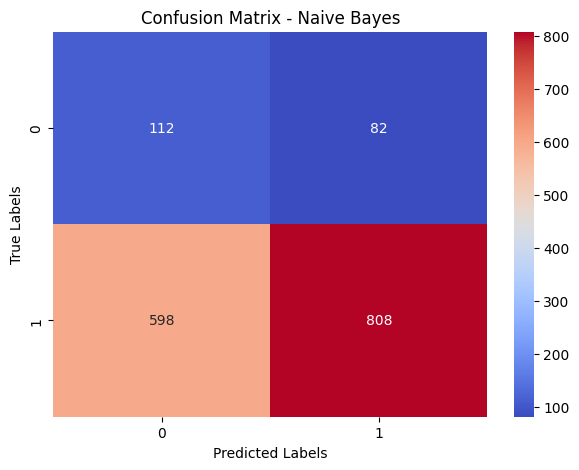

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_mat_NB,annot=True,fmt='d',cmap='coolwarm')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
naive_acc=accuracy_score(y_test,y_pred_NB)
naive_acc

0.575

In [ ]:
naive_f1=f1_score(y_test,y_pred_NB)
naive_f1

0.7038327526132404

In [ ]:
naive_pe = precision_score(y_test,y_pred_NB)
naive_pe

0.9078651685393259

### 3.4 - Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
clf_ex= Pipeline([
    ('ex', ExtraTreesClassifier())
])

In [ ]:
clf_ex.fit(X_train,y_train)

Pipeline(steps=[('ex', ExtraTreesClassifier())])

In [ ]:
y_pred_ex=clf_ex.predict(X_test)

In [ ]:
conf_mat_ex=confusion_matrix(y_test, y_pred_ex)

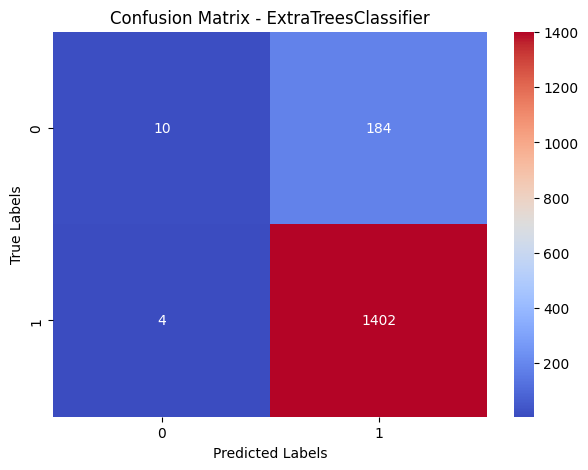

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_mat_ex,annot=True,fmt='d',cmap='coolwarm')
plt.title('Confusion Matrix - ExtraTreesClassifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
ex_acc=accuracy_score(y_test,y_pred_ex)
ex_acc

0.8825

In [ ]:
ex_f1=f1_score(y_test,y_pred_ex)
ex_f1

0.9371657754010695

In [ ]:
ex_pe=precision_score(y_test,y_pred_ex)
ex_pe

0.8839848675914249

### 3.5 - GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf_gb= Pipeline([
    ('gb', GradientBoostingClassifier())
])

In [ ]:
clf_gb.fit(X_train,y_train)

Pipeline(steps=[('gb', GradientBoostingClassifier())])

In [ ]:
y_pred_gb=clf_ex.predict(X_test)

In [ ]:
conf_mat_gb=confusion_matrix(y_test, y_pred_gb)

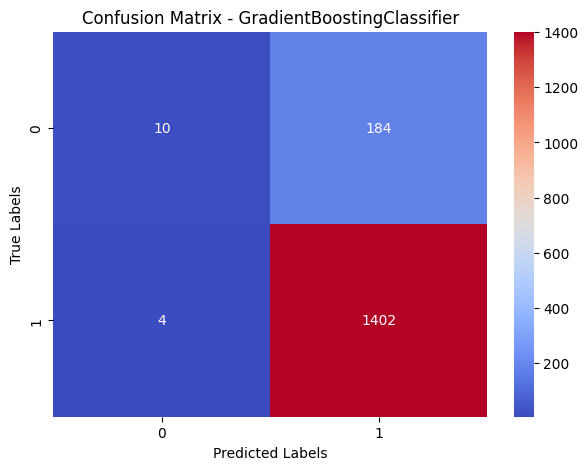

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_mat_gb,annot=True,fmt='d',cmap='coolwarm')
plt.title('Confusion Matrix - GradientBoostingClassifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
gb_acc=accuracy_score(y_test,y_pred_gb)
gb_acc

0.8825

In [ ]:
gb_f1=f1_score(y_test,y_pred_gb)
ex_f1

0.9371657754010695

In [ ]:
gb_pe=precision_score(y_test,y_pred_gb)
gb_pe

0.8839848675914249

### 3.6 - Checking Model Score

In [ ]:
metrics = {
    "Metric": ["Accuracy", "F1-Score", "Precision"],
    "Random Forest": [rf_acc, rf_f1, rf_pe],
    "Naive Bayes": [naive_acc, naive_f1, naive_pe],
    "Decision Tree": [dt_acc, dt_f1, dt_pe],
    "ExtraTreesClassifier": [ex_acc, ex_f1, ex_pe],
    "GradientBoostingClassifier Tree": [gb_acc, gb_f1, gb_pe]
}

In [ ]:
df_0 = pd.DataFrame(metrics)
print(df_0.to_string(index=False))

   Metric  Random Forest  Naive Bayes  Decision Tree  ExtraTreesClassifier  GradientBoostingClassifier Tree
 Accuracy       0.896875     0.575000       0.830625              0.882500                         0.882500
 F1-Score       0.944313     0.703833       0.902833              0.937166                         0.937166
Precision       0.898523     0.907865       0.910340              0.883985                         0.883985


# 4 - Conclusion and Recommendations

## 4.1 - Conclusion

Note:
* Thu nhập trung bình hàng năm của KH trong Dataset là 84K/Year
* Ads Bugdet trung bình là $5K
* CTR trung bình là 15%
* CR trung bình là 10%
* Traffic trung bình trong Dataset này là 24 user
* Trung bình 1 Page có 5.5 User vào
* Thời gian trung bình trên Website của User là 7'
* Số lần share content trung bình của User tử Website ra là 49 lần
* Số Email được mở trung bình bởi User là 9.4 Email
* Số lần click vào link trong Email trung bình bởi User là 4.4 lần
* Tổng số lần đã mua hàng của User trung bình là 4.4 lần
* Điểm tích lũy mua hàng trung bình của User là 2490 Points
* 12.3% User ở trạng thái No Conversion (988 User) và 87.6% User ở trạng thái Is Conversion (7012 User)
* Tỷ trọng User nữ là 60.5% (4839 User) và Tỷ trọng của User nam là 39.5% (3161 User)
---

* Hành vi mua sắm, thu nhập của User nữ trội User nam và nữ mua sắm đều hơn ở mọi độ tuổi, trong đó Nữ ở tuổi 25 nằm trong Top 10 tuổi có nhiều chuyển đổi nhất, Nam ở tuổi 30 trong Top 10 tuổi có nhiều chuyển đổi nhất. (Theo giới tính)
* Ngoài ra, Top 10 độ tuổi mua hàng nhiều nhất (Cả 2 giới tính) đều nằm từ 30 tuổi trở lên
* Các kênh Campaign có vẻ phân bổ gần như khá đều nhau, với Ads Spent và Income, Loyalty, tổng lượt mua hàng từ trước từ nguồn Referal nhỉnh hơn so với các kênh khác. Ngoài ra, Refferal và PPC là 2 nguồn convert được chuyển đổi cao nhất
* Ngân sách và số lượng cho các mục tiêu được phân bổ gần bằng nhau
* Model có khả năng dự đoán tốt nhất dựa trên F1 Score đó là: Random Forest với độ chính xác là 94%

## 4.2 - Recommendation

* Social Media & Email là 2 kênh có lượng Conversion và lượng Awareness Campaign thấp nhất, dồn ngân sách Ad cho các mục tiêu Awareness và giảm ở mục tiêu Consideration cho 2 kênh này
* Dồn thêm ngân sách cho các Campaign Source SEO vào mục tiêu Awareness và Consideration để tăng khả năng phủ và cân nhắc
* Điều tra thêm với đội Marketing tại sao lại phân bổ ngân sách cho các mục tiêu Campaign với tỷ trọng ngân sách gần như nhau

## Bonus - Clustering

Note: Có thể Target cho các chiến dịch Ads dựa theo các Segment ở dưới

### Age & Traffic

In [ ]:
df.head(0)

Empty DataFrame
Columns: [Age, Gender, Income, CampaignChannel, CampaignType, AdSpend, ClickThroughRate, ConversionRate, WebsiteVisits, PagesPerVisit, TimeOnSite, SocialShares, EmailOpens, EmailClicks, PreviousPurchases, LoyaltyPoints, Conversion]
Index: []

In [ ]:
df = df.drop(['Conversion'], axis=1)

In [ ]:
df.head(5)

Age  Gender  Income  CampaignChannel  CampaignType      AdSpend  \
0   56       1  136912                4             1  6497.870068   
1   69       0   41760                2             0  3898.668606   
2   46       1   88456                1             1  1546.429596   
3   32       1   44085                1             3   539.525936   
4   60       1   83964                1             3  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  
0            19           6            9                  4            688  
1             5           2            7                  2           3459  
2             0          11            2                  8           2337  
3            89           2            2                  0           2463  
4             6           6            6                  8           4345

In [ ]:
from sklearn.cluster import KMeans
X1 = df[['Age','WebsiteVisits']]
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1400: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



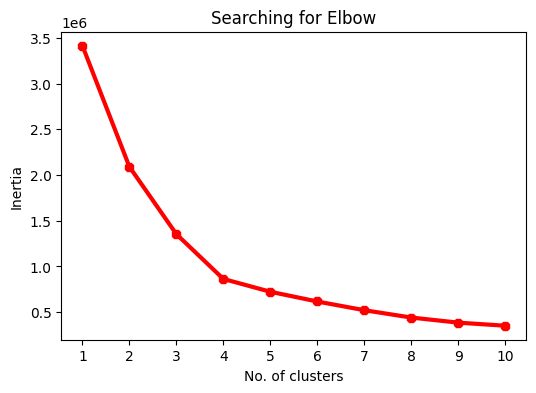

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia)
plt.plot(range(1,11), inertia, linewidth=3, color='red', marker='8')
plt.title('Searching for Elbow')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1,11,1))
plt.show()

In [ ]:
km = KMeans(n_clusters=10)
km.fit(X1)
y = km.predict(X1)
X1['Label'] = y
X1.head()

<ipython-input-274-747f27d49c10>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Age  WebsiteVisits  Label
0   56              0      6
1   69             42      8
2   46              2      7
3   32             47      2
4   60              0      6

<Axes: xlabel='Age', ylabel='WebsiteVisits'>

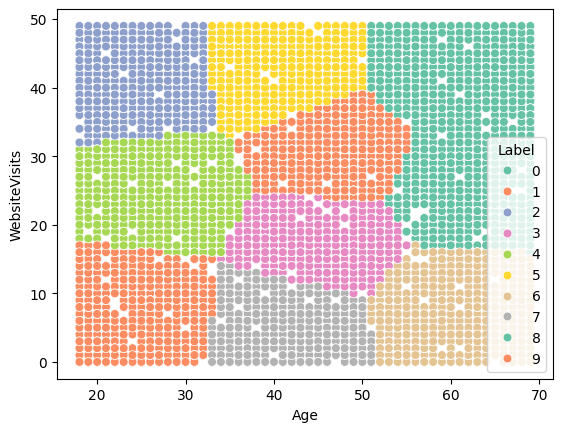

In [ ]:
sns.scatterplot(x='Age', y='WebsiteVisits', data=X1, hue='Label', s=40, palette='Set2')

### Age & Time On Site

In [ ]:
from sklearn.cluster import KMeans
X1 = df[['Age','TimeOnSite']]
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1400: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


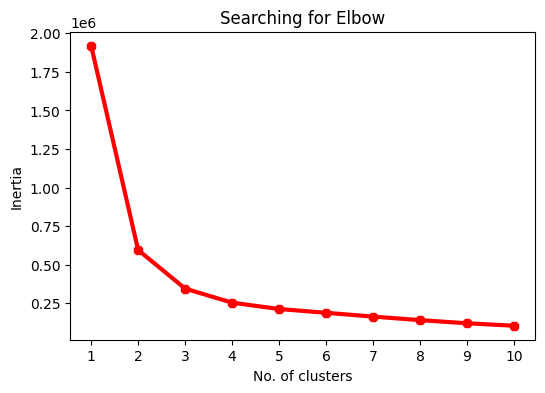

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia)
plt.plot(range(1,11), inertia, linewidth=3, color='red', marker='8')
plt.title('Searching for Elbow')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1,11,1))
plt.show()

In [ ]:
km = KMeans(n_clusters=8)
km.fit(X1)
y = km.predict(X1)
X1['Label'] = y
X1.head()

<ipython-input-285-28827553cada>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Age  TimeOnSite  Label
0   56    7.396803      4
1   69    5.352549      1
2   46   13.794901      0
3   32   14.688363      7
4   60   13.993370      5

<Axes: xlabel='Age', ylabel='TimeOnSite'>

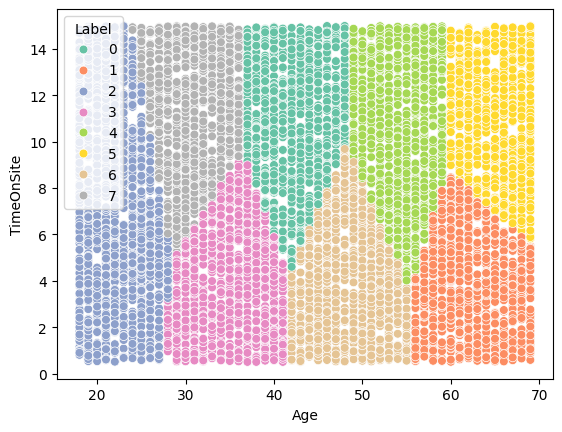

In [ ]:
sns.scatterplot(x='Age', y='TimeOnSite', data=X1, hue='Label', s=40, palette='Set2')

### Income & Ad Spend

In [ ]:
df.head(0)

Empty DataFrame
Columns: [Age, Gender, Income, CampaignChannel, CampaignType, AdSpend, ClickThroughRate, ConversionRate, WebsiteVisits, PagesPerVisit, TimeOnSite, SocialShares, EmailOpens, EmailClicks, PreviousPurchases, LoyaltyPoints]
Index: []

In [ ]:
from sklearn.cluster import KMeans
X1 = df[['Income','AdSpend']]
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1400: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



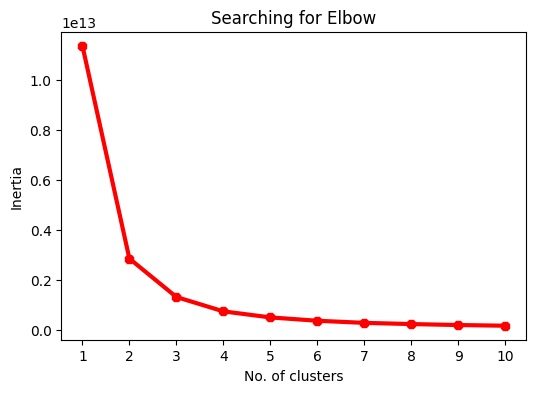

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia)
plt.plot(range(1,11), inertia, linewidth=3, color='red', marker='8')
plt.title('Searching for Elbow')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1,11,1))
plt.show()

In [ ]:
km = KMeans(n_clusters=7)
km.fit(X1)
y = km.predict(X1)
X1['Label'] = y
X1.head()

<ipython-input-341-6888f60c992a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Income      AdSpend  Label
0  136912  6497.870068      2
1   41760  3898.668606      6
2   88456  1546.429596      4
3   44085   539.525936      6
4   83964  1678.043573      4

<Axes: xlabel='Income', ylabel='AdSpend'>

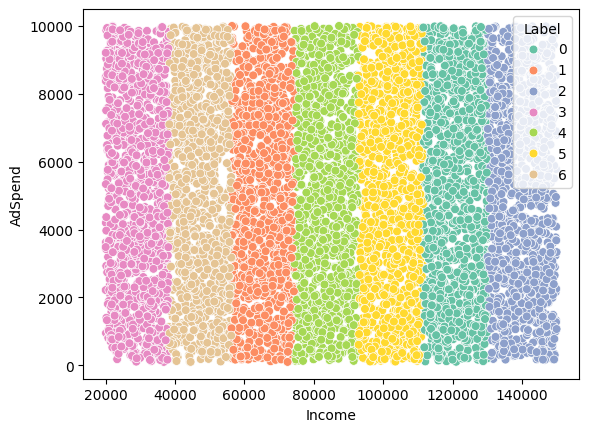

In [ ]:
sns.scatterplot(x='Income', y='AdSpend', data=X1, hue='Label', s=40, palette='Set2')

### CTR & CR

In [ ]:
df.head(0)

Empty DataFrame
Columns: [Age, Gender, Income, CampaignChannel, CampaignType, AdSpend, ClickThroughRate, ConversionRate, WebsiteVisits, PagesPerVisit, TimeOnSite, SocialShares, EmailOpens, EmailClicks, PreviousPurchases, LoyaltyPoints]
Index: []

In [ ]:
from sklearn.cluster import KMeans
X1 = df[['ClickThroughRate','ConversionRate']]
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1400: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



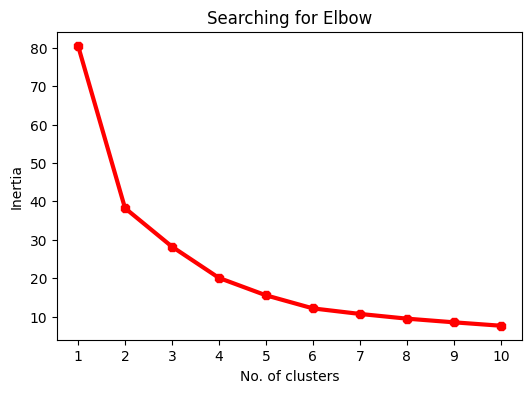

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia)
plt.plot(range(1,11), inertia, linewidth=3, color='red', marker='8')
plt.title('Searching for Elbow')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1,11,1))
plt.show()

In [ ]:
km = KMeans(n_clusters=8)
km.fit(X1)
y = km.predict(X1)
X1['Label'] = y
X1.head()

<ipython-input-346-28827553cada>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ClickThroughRate  ConversionRate  Label
0          0.043919        0.088031      2
1          0.155725        0.182725      3
2          0.277490        0.076423      1
3          0.137611        0.088004      0
4          0.252851        0.109940      5

<Axes: xlabel='ClickThroughRate', ylabel='ConversionRate'>

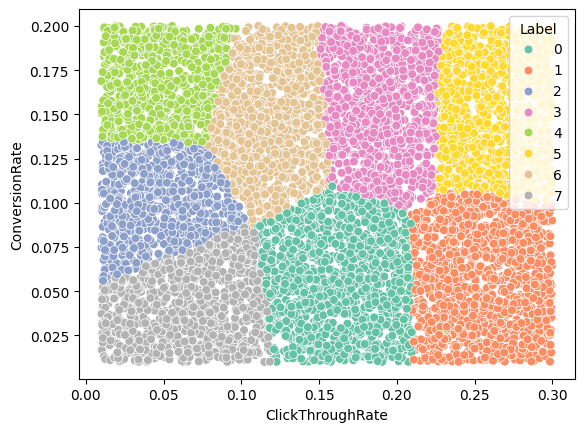

In [ ]:
sns.scatterplot(x='ClickThroughRate', y='ConversionRate', data=X1, hue='Label', s=40, palette='Set2')

### WebsiteVisits, PagesPerVisit & TimeOnSite

In [ ]:
df.head(0)

Empty DataFrame
Columns: [Age, Gender, Income, CampaignChannel, CampaignType, AdSpend, ClickThroughRate, ConversionRate, WebsiteVisits, PagesPerVisit, TimeOnSite, SocialShares, EmailOpens, EmailClicks, PreviousPurchases, LoyaltyPoints]
Index: []

In [ ]:
from sklearn.cluster import KMeans
X1 = df[['WebsiteVisits','PagesPerVisit','TimeOnSite']]
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1400: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



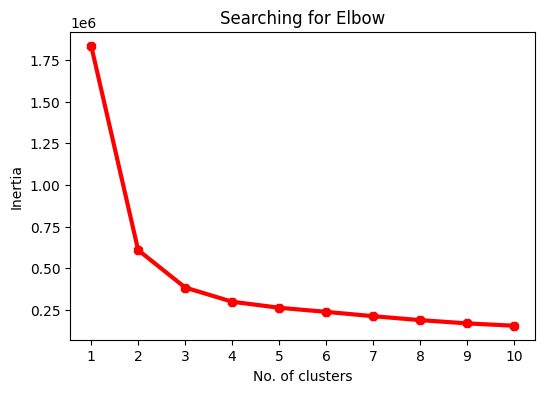

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia)
plt.plot(range(1,11), inertia, linewidth=3, color='red', marker='8')
plt.title('Searching for Elbow')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1,11,1))
plt.show()

In [ ]:
km = KMeans(n_clusters=7)
km.fit(X1)
y = km.predict(X1)
X1['Label'] = y
X1.head()

<ipython-input-320-6888f60c992a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



WebsiteVisits  PagesPerVisit  TimeOnSite  Label
0              0       2.399017    7.396803      1
1             42       2.917138    5.352549      4
2              2       8.223619   13.794901      1
3             47       4.540939   14.688363      2
4              0       2.046847   13.993370      1

In [ ]:
import plotly.express as px

# Create a dynamic 3D scatter plot
fig = px.scatter_3d(
    X1,  # DataFrame containing your data
    x=X1.columns[0],  # Replace with your actual column for x-axis, e.g., 'Age'
    y=X1.columns[1],  # Replace with your column for y-axis, e.g., 'Annual Income'
    z=X1.columns[2],  # Replace with your column for z-axis, e.g., 'Spending Score'
    color='Label',    # Cluster labels for coloring
    title='3D Scatter Plot of Clusters',
    labels={
        X1.columns[0]: 'WebsiteVisits',
        X1.columns[1]: 'PagesPerVisit',
        X1.columns[2]: 'TimeOnSite'
    },
    opacity=0.7,  # Set transparency of points
    size_max=6,  # Adjust point size scaling
)

# Update the layout for better viewing
fig.update_layout(
    scene=dict(
        xaxis_title='WebsiteVisits',
        yaxis_title='PagesPerVisit',
        zaxis_title='TimeOnSite'
    ),
    margin=dict(l=0, r=0, b=0, t=40)  # Set margins for clean visuals
)

# Show the interactive plot
fig.show()


## 4.3 - Try the Model

Note: Có thể check thêm phần Clustering để gán data vào Model dự đoán

In [ ]:
new_data = {
    'Age': [30], # Age of the user
    'Gender': [0],  # 1: Male, 0: Female
    'Income': [60000], # Annual Income of the users ($)
    'CampaignChannel': [1],  # Campaign channel: 1 - PPC, 2 - SEO, 3 - Email, 4 - Social Media, 5 - Referral
    'CampaignType': [3],  # Campaign type: 1 - Awareness, 2 - Consideration, 3 - Conversion, 4 - Retention
    'AdSpend': [20000], # Ads Budget (Dollars)
    'ClickThroughRate': [0.2],
    'ConversionRate': [0.1],
    'WebsiteVisits': [3], # Traffic usage to the Website
    'PagesPerVisit': [2],
    'TimeOnSite': [2], # Time on site by minute
    'SocialShares': [3],
    'EmailOpens': [2],
    'EmailClicks': [1],
    'PreviousPurchases': [0], # Total Previous Purchase
    'LoyaltyPoints': [0]
}

In [ ]:
input_df = pd.DataFrame(new_data)

In [ ]:
prediction = clf_rf.predict(input_df)

In [ ]:
if prediction[0] == 1:
    print("The model predicts conversion")
else:
    print("The model predicts no conversion")

The model predicts conversion
